In [52]:
import numpy as np
import matplotlib.pyplot as plt
import cmath  
from numpy import *
# Program written by Nicholas Munoz

In [231]:
#Definition

twopi  = 2.*np.pi
sq2pi = 1./sqrt(twopi)
a = 0.
b = twopi
n = 500
t = a;       h = (b-a)/n;

In [232]:
ydumb = np.zeros((2), float)    
y = np.zeros((2), float)
fReturn = np.zeros((2), float)  
k1 = np.zeros((2), float)
k2 = np.zeros((2), float)       
k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;   y[1] = -1.
xp=np.array([0.0])
yp=np.array([y[0]])

In [233]:
def f( t, y):                                           # Force function 
    fReturn[0] = y[1]
    fReturn[1] = -0.01*y[0]**11                         #F=-0.01y[0]^11
    return fReturn

In [234]:
def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                        # Returns RHS's  
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y  


In [235]:
def FT(dftz):    # Fourier Transform                                          
    for i in range(0, n):              # n frequency
        zsum = complex(0.0, 0.0)                
        for j in range(0, n):                              
            zexpo = complex(0, twopi*i*j/n)           
            zsum += signal[j]*exp(-zexpo)     #y[k]*e^-zexpo
        dftz[i] = zsum * sq2pi      
        nplot[i] = i
        fplot[i] = sqrt(dftz[i].imag*dftz[i].imag+dftz[i].real*dftz[i].real)

In [236]:
def IFT(idftz,dftz):        #Inverse Fourier Transform                                      
    for i in range(0, n):              # n frequency
        zsum = complex(0.0, 0.0)                
        for  j in range(0, n):                              
            zexpo = complex(0, twopi*i*j/n)              
            zsum += dftz[j]*exp(zexpo)                    #y[n]*e^zexpo
        idftz[i] = zsum * 1./sq2pi/n      
        xplot[i] = i*twopi/n
        ifplot[i] = idftz[i].real

In [237]:
def IFT2(idftz,dftz): 
    count = 0
    for i in range(0, n):             
      zsum = complex(0.0, 0.0)                
      for  j in range(0, n):                              
        zexpo = complex(0, twopi*i*j/n)               
        if (fplot[j]/fplot[0] <= 0.1): 
            dftz[j]=0      #10% filtering
        zsum += dftz[j]*exp(zexpo)                    #y[n]*e^zexp
        count+= 1
      idftz[i] = zsum * 1./sq2pi/n      
      xplot[i] = i*twopi/n
      ifplot[i] = idftz[i].real
    
    print(zsum.real)
    #print (100*i/count,'%')
    print('n = ',i)
    

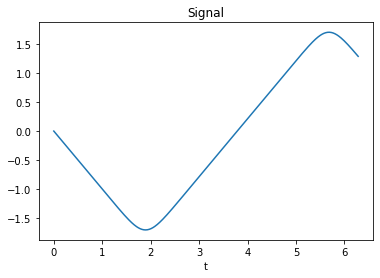

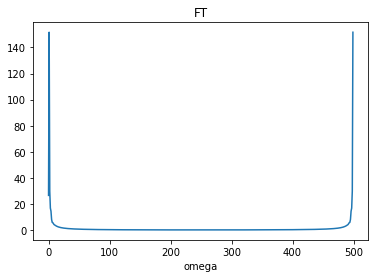

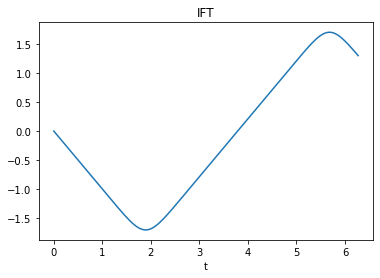

138.93757252675454
n =  499


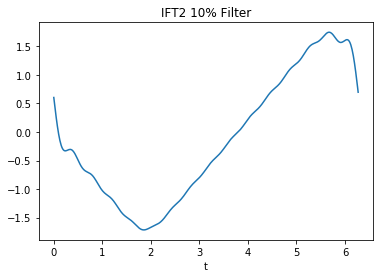

In [238]:
#make signal
while (t < b):                          
    if ((t + h) > b):
        h = b - t                       
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
    
signal = yp; 
dftz  = zeros( n, complex )                 
idftz   = zeros( (n), complex )
xplot = zeros( n, float )   
nplot = zeros( n, float )   
fplot = zeros( n, float ) 
ifplot  = zeros( n, complex )                  



FT(dftz)   
IFT(idftz,dftz)       
plt.plot(xp,signal,'-')
plt.xlabel("t")
plt.title("Signal")
plt.show()
plt.plot(nplot,fplot,'-')
plt.xlabel('omega')
plt.title("FT")
plt.show()
plt.plot(xplot,ifplot,'-')
plt.xlabel("t")
plt.title("IFT")
plt.show()
IFT2(idftz,dftz)          
plt.plot(xplot,ifplot,"-")
plt.xlabel("t")
plt.title("IFT2 10% Filter")
plt.show()